# Week 3

### 01 Assignment

[The assignment can be found here.](https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/03-Exercise.ipynb)

### 02 Status

I completed all the exercises. 

### 03 Solutions
#### Exercise 1
The solution to 1 - 6 is in modules/week03_ex1.py

In [61]:
%matplotlib inline
%matplotlib notebook
import modules.week03_ex1 as ex1

In [97]:
# 7
import random 
import csv

def generate_students(n):
    """A function that can generate n number of students with random:
    name, gender, courses (from a fixed list of course names), grades, img_url

    Parameters:
    n: Number of random student wanted
    """
    students = []
    names = ['John', 'Jane', 'Jessica', 'Jack', 'Bob', 'Billy', 'Josephine', 'Anne', 'Susan', 'George', 'Rex']
    genders = ['female', 'male', 'other']
    grades = [-3, 0, 2, 4, 7, 10, 12]
    course_names = ['Math', 'English', 'History', 'PE', 'Programming', 'Security']
    classrooms = ['C-105', 'C-162', 'C-102', 'C-265']
    
    for i in range(n):
        no_courses = random.choice(range(5)) + 1
        courses = []
        for course_name in random.sample(course_names, no_courses):
            courses.append(ex1.Course(course_name, 
            random.choice(classrooms), random.choice(names), ((random.choice(range(5)) + 1) * 10), random.choice(grades)))
        image_url = 'picture' + str(i) + '.jpg'
        student = ex1.Student(random.choice(names), random.choice(genders), ex1.DataSheet(courses), image_url)  
        students.append(student)
    return students

students = generate_students(10)
print(students)

[Student('Bob', 'female', Datasheet([Course('English', 'C-102', 'Josephine', 10, 10), Course('Programming', 'C-162', 'Bob', 40, 12), Course('Security', 'C-105', 'Anne', 30, 7), Course('PE', 'C-102', 'Anne', 30, 10)]), 'picture0.jpg'), Student('Anne', 'other', Datasheet([Course('Security', 'C-162', 'Rex', 40, 12), Course('History', 'C-105', 'Susan', 20, -3)]), 'picture1.jpg'), Student('Jane', 'other', Datasheet([Course('Security', 'C-105', 'Bob', 40, 10), Course('Programming', 'C-162', 'Rex', 30, 12)]), 'picture2.jpg'), Student('George', 'male', Datasheet([Course('PE', 'C-265', 'John', 10, 10), Course('Programming', 'C-102', 'Jack', 50, 10), Course('Math', 'C-265', 'Rex', 30, 7), Course('Security', 'C-105', 'George', 10, 7)]), 'picture3.jpg'), Student('Anne', 'female', Datasheet([Course('PE', 'C-265', 'Jessica', 30, 0), Course('English', 'C-105', 'Bob', 30, 0), Course('Security', 'C-265', 'Josephine', 10, 10), Course('History', 'C-265', 'Billy', 30, 2)]), 'picture4.jpg'), Student('Rex',

In [98]:
# 7.A
def write_students_to_csv(students, out='students.csv'):
    """Writes a list of students to a csv file with format:
    stud_name, course_name, teacher, ects, classroom, grade, img_url

    Parameters:
    students: List of students
    """
    with open(out, 'w') as csv_file:
        fieldnames = ['stud_name', 'course_name', 'teacher', 'gender', 'ects', 'classroom', 'grade', 'img_url']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for student in students:
            courses = student.data_sheet.courses
            for course in courses:
                writer.writerow({'stud_name': student.name, 'course_name': course.name, 'teacher': course.teacher, 'gender':
                student.gender, 'ects': course.ECTS, 'classroom': course.classroom, 'grade': course.grade,
                'img_url': student.image_url})

write_students_to_csv(students)

# 8
def read_students_from_csv(csv_file):
    students = []
    with open(csv_file, 'r') as file_object:
        reader = csv.DictReader(file_object)
        student_name = ''
        courses = []
        for row in reader:
            if student_name == '':
                student_name = row['stud_name']
            if student_name == row['stud_name']:
                courses.append(ex1.Course(row['course_name'], row['classroom'], row['teacher'], row['ects'], row['grade']))
                student_name = row['stud_name']
            else:
                data_sheet = ex1.DataSheet(courses)
                students.append(ex1.Student(student_name, row['gender'], data_sheet, row['img_url']))
                courses = []
                courses.append(ex1.Course(row['course_name'], row['classroom'], row['teacher'], row['ects'], row['grade']))
                student_name = row['stud_name']
    return students

read_students_from_csv('students.csv')
# Last student missing and wrong imageurl??

[Student('Bob', 'other', Datasheet([Course('English', 'C-102', 'Josephine', '10', '10'), Course('Programming', 'C-162', 'Bob', '40', '12'), Course('Security', 'C-105', 'Anne', '30', '7'), Course('PE', 'C-102', 'Anne', '30', '10')]), 'picture1.jpg'),
 Student('Anne', 'other', Datasheet([Course('Security', 'C-162', 'Rex', '40', '12'), Course('History', 'C-105', 'Susan', '20', '-3')]), 'picture2.jpg'),
 Student('Jane', 'male', Datasheet([Course('Security', 'C-105', 'Bob', '40', '10'), Course('Programming', 'C-162', 'Rex', '30', '12')]), 'picture3.jpg'),
 Student('George', 'female', Datasheet([Course('PE', 'C-265', 'John', '10', '10'), Course('Programming', 'C-102', 'Jack', '50', '10'), Course('Math', 'C-265', 'Rex', '30', '7'), Course('Security', 'C-105', 'George', '10', '7')]), 'picture4.jpg'),
 Student('Anne', 'female', Datasheet([Course('PE', 'C-265', 'Jessica', '30', '0'), Course('English', 'C-105', 'Bob', '30', '0'), Course('Security', 'C-265', 'Josephine', '10', '10'), Course('Histo

In [99]:
# 8.A
def print_student(students):
    for student in students:
        print('Name of student: %s. Image URL: %s. Average grade: %s' % (student.name, student.image_url, 
                                                                         student.get_avg_grade()))


print_student(students)

Name of student: Bob. Image URL: picture0.jpg. Average grade: 9.75
Name of student: Anne. Image URL: picture1.jpg. Average grade: 4.5
Name of student: Jane. Image URL: picture2.jpg. Average grade: 11.0
Name of student: George. Image URL: picture3.jpg. Average grade: 8.5
Name of student: Anne. Image URL: picture4.jpg. Average grade: 3.0
Name of student: Rex. Image URL: picture5.jpg. Average grade: 3.8
Name of student: Billy. Image URL: picture6.jpg. Average grade: -3.0
Name of student: John. Image URL: picture7.jpg. Average grade: 2.67
Name of student: Jane. Image URL: picture8.jpg. Average grade: 5.25
Name of student: Jack. Image URL: picture9.jpg. Average grade: 12.0


In [100]:
# 8.B
def sort_by_avg_grade(students):
    for student in sorted(students, key=ex1.Student.get_avg_grade, reverse=True):
        print('Name of student: {}. Average grade: {}'.format(student.name,student.get_avg_grade()))

sort_by_avg_grade(students)

Name of student: Jack. Average grade: 12.0
Name of student: Jane. Average grade: 11.0
Name of student: Bob. Average grade: 9.75
Name of student: George. Average grade: 8.5
Name of student: Jane. Average grade: 5.25
Name of student: Anne. Average grade: 4.5
Name of student: Rex. Average grade: 3.8
Name of student: Anne. Average grade: 3.0
Name of student: John. Average grade: 2.67
Name of student: Billy. Average grade: -3.0


<IPython.core.display.Javascript object>


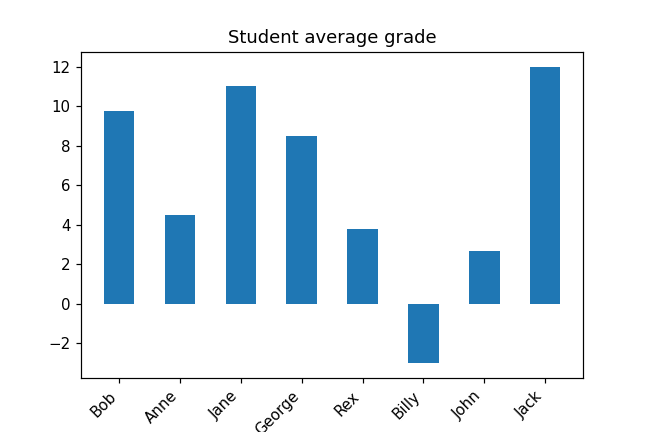

In [102]:
# 8.C
import matplotlib.pyplot as plt

def show_avg_grade_bar_chart(students):
    student_names = []
    avg_grades = []
    for student in students:
        student_names.append(student.name)
        avg_grades.append(student.get_avg_grade())
    plt.bar(student_names, avg_grades, width=0.5, align='center')
    plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
    plt.title('Student average grade')

show_avg_grade_bar_chart(students) 

In [103]:
# 9
for student in students:
    print(student.name + ' has completed ' + str(student.get_study_progression()) + ' %')

Bob has completed 73.33333333333333 %
Anne has completed 40.0 %
Jane has completed 46.666666666666664 %
George has completed 66.66666666666666 %
Anne has completed 66.66666666666666 %
Rex has completed 80.0 %
Billy has completed 20.0 %
John has completed 80.0 %
Jane has completed 80.0 %
Jack has completed 6.666666666666667 %


<IPython.core.display.Javascript object>


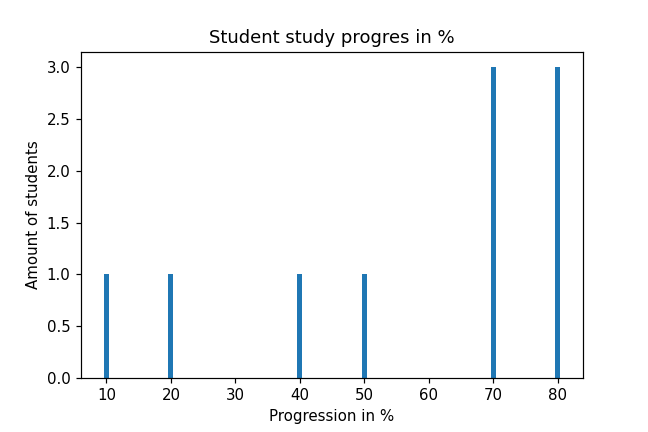

In [109]:
# 10
import matplotlib.pyplot as plt

def show_study_progression_bar_chart(students):
    progression = {}
    category_steps = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
    for student in students:
        s_progression = student.get_study_progression()
        for category in category_steps:
            if round(s_progression/10)*10 == category:
                if not category in progression:
                    progression[category] = 1
                else:
                    progression[category] += 1
    plt.bar(progression.keys(), progression.values())
    plt.xlabel('Progression in %')
    plt.ylabel('Amount of students')
    plt.title('Student study progres in %')

show_study_progression_bar_chart(students)

#### Exercise 2

In [107]:
# 1 - 2
class NotEnoughStudentsException(Exception):
    pass

def three_closest_to_completion(students):
    """Gets the 3 students from a list who are closest to completing their studies
    
    Parameters:
    students: Student list
    """
    try:
        if len(students) < 3:
            raise NotEnoughStudentsException()
        else:
            top3 = sorted(students, key=ex1.Student.get_study_progression, reverse=True)
            return [top3[0], top3[1], top3[2]]
    except NotEnoughStudentsException:
        return 'There needs to be at least 3 students in the list'

print(three_closest_to_completion(students))
print(three_closest_to_completion([]))

[Student('Rex', 'female', Datasheet([Course('English', 'C-265', 'Jane', 20, 4), Course('Math', 'C-102', 'Jane', 40, -3), Course('Security', 'C-265', 'George', 30, 4), Course('Programming', 'C-102', 'John', 20, 10), Course('PE', 'C-105', 'Jessica', 10, 4)]), 'picture5.jpg'), Student('John', 'male', Datasheet([Course('English', 'C-265', 'Anne', 50, -3), Course('Security', 'C-162', 'Rex', 20, 4), Course('Math', 'C-162', 'Bob', 50, 7)]), 'picture7.jpg'), Student('Jane', 'female', Datasheet([Course('History', 'C-162', 'Anne', 30, 7), Course('PE', 'C-162', 'John', 20, 2), Course('Security', 'C-162', 'Billy', 30, 0), Course('English', 'C-102', 'Jack', 40, 12)]), 'picture8.jpg')]
There needs to be at least 3 students in the list


In [106]:
# 3 - 3.A
import csv

def write_to_file(students, out='top3.csv'):
    """Writes each student in a list to a .csv file

    Parameters:
    students: Student list
    out: Name of output .csv file. Default is top3.csv
    """
    with open(out, 'w') as file_object:
        try:
            if len(students) < 3:
                raise NotEnoughStudentsException()
            else: 
                for student in students:
                    file_object.write('%s\n' % student)
        except NotEnoughStudentsException:
            file_object.write('There needs to be at least 3 students in the list')

top3 = three_closest_to_completion(students)
write_to_file(top3)
write_to_file([])

#### Exercise 3

In [ ]:
# 1
